## Limpeza e Tratamento de Dados

##### Criação de um modelo Churn análise para uma instituição financeira para prever os clientes que pretende sair da instituição e se previnir para evitar saida.

In [47]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [48]:
# Importando dados
dataset = pd.read_csv('Churn.csv', sep=';')

# Visualizar 
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [49]:
# Tamanho do dataset
dataset.shape

(999, 12)

In [50]:
# Primeiro problema e dar nomes as colunas 
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Padrimonio', 
                   'Saldo', 'Produto', 'TemCartCredito', 'Ativo', 'Salario', 
                   'Saiu']

In [51]:
# Visualizar 
dataset.head()

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Análise Exploratória

##### Instituição atende a região sul então iniciar a exploração dos dados categoricos pelo estado

In [52]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

##### Retorna os dados de 6 estados sendo dois inexistente e SP não sendo atendido pela instituição, sendo necessario retirada desse erros para não impactar no modelo.

<AxesSubplot:xlabel='Estado'>

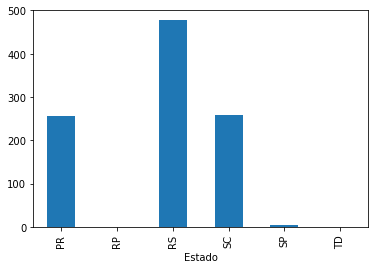

In [53]:
# Grafico de barra apresentando os valores por estado
agrupado.plot.bar()

In [54]:
# Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

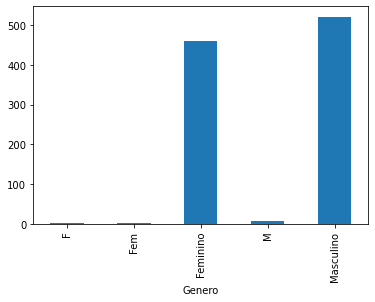

In [55]:
agrupado.plot.bar()

In [56]:
# Explorando colunas númericas Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

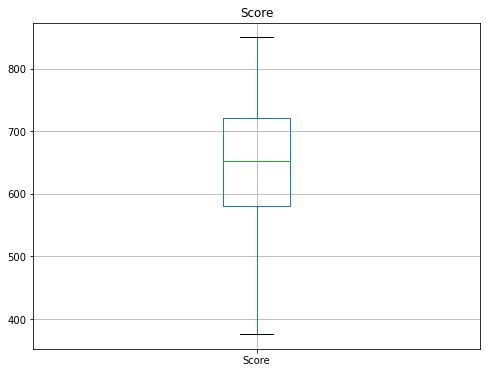

In [69]:
# Usando um boxplot para visualizar o grafico
dataset['Score'].plot.box(grid=True, figsize=(8,6)).set_title('Score')

C:\Users\wende\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

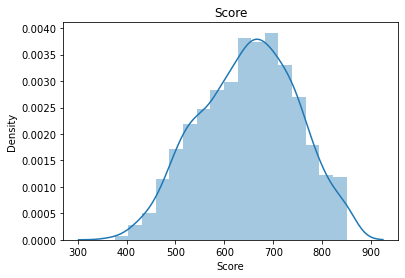

In [74]:
srn.distplot(dataset['Score']).set_title('Score')

In [75]:
#idade
dataset['Idade'].describe()
# Necessario verificar a min e a max pois retorno não condiz com idade

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

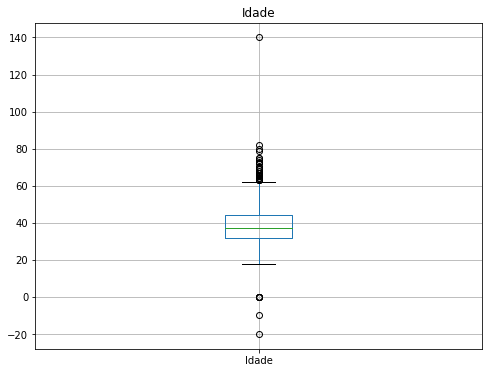

In [76]:
dataset['Idade'].plot.box(grid=True, figsize=(8,6)).set_title('Idade')

C:\Users\wende\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

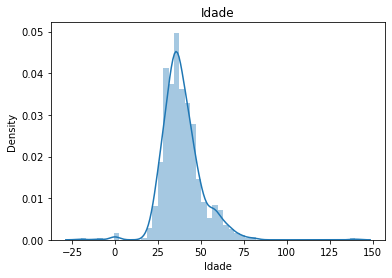

In [79]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [80]:
#Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

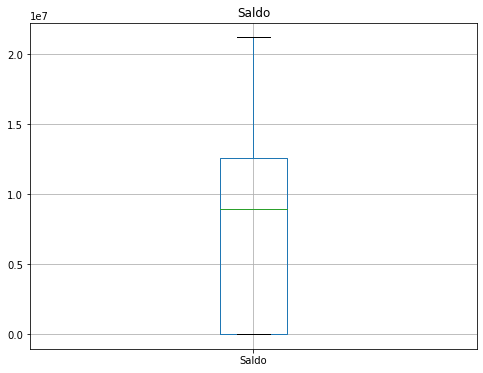

In [83]:
dataset['Saldo'].plot.box(grid=True, figsize=(8,6)).set_title('Saldo')

C:\Users\wende\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

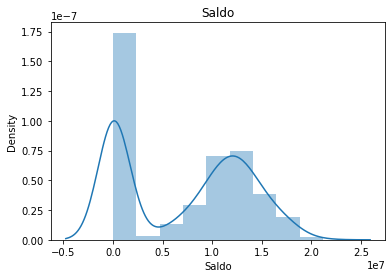

In [85]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [82]:
#Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

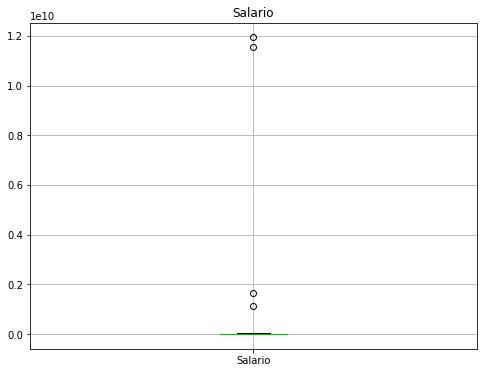

In [84]:
dataset['Salario'].plot.box(grid=True, figsize=(8,6)).set_title('Salario')

C:\Users\wende\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

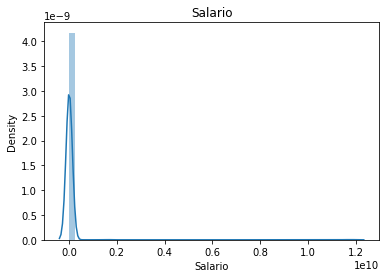

In [86]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [87]:
# Contamos valores NAN em genero e salario
dataset.isnull().sum()
# Retorna 8 valores em genero e 7 em salario

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Padrimonio        0
Saldo             0
Produto           0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

### Tratamentos dos Dados

In [88]:
# Remover NAN e substituir pela mediana os salarios
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [90]:
# Função pega todos os valores e tras a mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [92]:
# Substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [93]:
# Verificar se NAN não existe mais
dataset['Salario'].isnull().sum()
# Retorna zero NAN

0

In [95]:
# Verificar falta de padronização e NANs de genero
agrupados = dataset.groupby(['Genero']).size()
agrupados

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [97]:
# Total de NANs
dataset['Genero'].isnull().sum()

8

In [99]:
# Preencher NAs com Masculino (usando a moda)
dataset['Genero'].fillna('Masculino', inplace=True)

# Verificar novamente NANs
dataset['Genero'].isnull().sum()

0

In [102]:
# Padronizar de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

# Visualizar o resultado
agrupados = dataset.groupby(['Genero']).size()
agrupados

Genero
Feminino     464
Masculino    535
dtype: int64

In [103]:
# Idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [104]:
# Visualizar 
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [105]:
# Calcular a mediana
mediana = sts.median(dataset["Idade"])
mediana

37

In [107]:
# Substituir erro de idades pela mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

# Visualizar  se ainda existe idade fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


In [109]:
# Verificar dados duplicados, buscando pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [111]:
# Excluindo pelo ID
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

# Buscando duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


In [116]:
# Verificar os estados fora de dominio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [118]:
# Atribuir valores a RS (moda)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

# Verificando
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

In [120]:
# Outliers em salário, considerando 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

529784177.6096346

In [121]:
# Definir padrão como maior que 2 desvios padrão, verificar
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [122]:
# Usar mediana para salarios acima do desvio
mediana = sts.median(dataset['Salario'])
mediana

8641028.0

In [123]:
# Substituir 
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

# Verificando
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Padrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


In [127]:
# Dados estão limpos e tratados